# spaCy Layout

In [139]:
import spacy
from spacy_layout import spaCyLayout

nlp = spacy.blank("de")
layout = spaCyLayout(nlp)

doc = layout("../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_1.pdf")



2025-11-26 21:50:48,560 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-11-26 21:50:48,566 - INFO - Going to convert document batch...
2025-11-26 21:50:48,566 - INFO - Initializing pipeline for StandardPdfPipeline with options hash f9730ffaa6e7f8d4fb0c98c8df3f18cb
2025-11-26 21:50:48,567 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-11-26 21:50:48,568 - INFO - easyocr cannot be used because it is not installed.
2025-11-26 21:50:48,568 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-11-26 21:50:48,575 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-11-26 21:50:48,579 [RapidOCR] download_file.py:60: File exists and is valid: /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO] 2025-11-26 21:50:48,580 [RapidOCR] torch.py:54: Using /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO

In [143]:
import glob
from tqdm import tqdm
from PyPDF2 import PdfMerger
import spacy
from spacy_layout import spaCyLayout

# -----------------------------
# 1️⃣ Alle PDFs im Ordner finden
# -----------------------------
pdf_files = glob.glob("../data/DSA/Der_blaue_Bruder/*.pdf")

print("Gefundene PDF-Dateien:")
for name in pdf_files:
    print("  ", name)
print("\nAnzahl PDFs:", len(pdf_files))

# Wenn keine PDFs → Abbruch
if not pdf_files:
    raise FileNotFoundError("Keine PDFs gefunden!")

# -----------------------------------------
# 2️⃣ PDF-Dateien zusammenführen (mergen)
# -----------------------------------------

merged_pdf_path = "../data/DSA/Der_blaue_Bruder/_combined.pdf"

merger = PdfMerger()

print("\n🔄 PDFs werden zusammengeführt...\n")
for pdf in tqdm(pdf_files, desc="PDFs mergen"):
    merger.append(pdf)

merger.write(merged_pdf_path)
merger.close()

print("\n✅ Erfolgreich gemerged zu:", merged_pdf_path)

# -----------------------------------------
# 3️⃣ spaCyLayout initialisieren
# -----------------------------------------
nlp = spacy.blank("de")
layout = spaCyLayout(nlp)

print("\n📄 spaCyLayout liest das kombinierte PDF ein...\n")

# -----------------------------------------
# 4️⃣ Ein einziges großes spaCy-Dokument erzeugen
# -----------------------------------------
doc = layout(merged_pdf_path)

print("📌 Beispieltext aus dem erzeugten Doc:")
print(doc.text[:500])
print("\nGesamtlänge des Textes:", len(doc.text))


Gefundene PDF-Dateien:
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_1.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_2.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_3.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_4.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_5.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_6.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_7.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_8.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_9.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_10.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_11.pdf
   ../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_12.pdf

Anzahl PDFs: 12

🔄 PDFs werden zusammengeführt...



PDFs mergen: 100%|██████████| 12/12 [00:00<00:00, 852.95it/s]
2025-11-26 21:57:00,961 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-11-26 21:57:00,985 - INFO - Going to convert document batch...
2025-11-26 21:57:00,986 - INFO - Initializing pipeline for StandardPdfPipeline with options hash f9730ffaa6e7f8d4fb0c98c8df3f18cb
2025-11-26 21:57:00,988 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-11-26 21:57:00,988 - INFO - easyocr cannot be used because it is not installed.
2025-11-26 21:57:00,989 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-11-26 21:57:00,995 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-11-26 21:57:01,001 [RapidOCR] download_file.py:60: File exists and is valid: /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/rapidocr/models/ch_PP-OCRv4_det_infer.pth
[INFO] 2025-11-26 21:57:01,001 [RapidOCR] torch.py:54: Using /home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13


✅ Erfolgreich gemerged zu: ../data/DSA/Der_blaue_Bruder/_combined.pdf

📄 spaCyLayout liest das kombinierte PDF ein...



2025-11-26 21:57:01,200 - INFO - Auto OCR model selected rapidocr with torch.
2025-11-26 21:57:01,201 - INFO - Accelerator device: 'cuda:0'
2025-11-26 21:57:02,180 - INFO - Accelerator device: 'cuda:0'
2025-11-26 21:57:02,426 - INFO - Processing document _combined.pdf
2025-11-26 21:57:22,557 - INFO - Finished converting document _combined.pdf in 21.60 sec.


📌 Beispieltext aus dem erzeugten Doc:
DSA-Forum

Geggründet in 2002 ist das DSAforum das größe deutschsprachige DSA  Fanforum https://dsaforum.de/

[DSA  4+5] Der blaue Bruder

https://dsaforum.de/viewtopic.php?t=56889

[DSA  4+5] DER  BLAUE  BRUDER

von Shanna

Seite 1 von 12

Verfasst: 22.08.2021 18:14

Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowi

Gesamtlänge des Textes: 248965


In [13]:
print(doc.text)

DSA-Forum

Geggründet in 2002 ist das DSAforum das größe deutschsprachige DSA  Fanforum https://dsaforum.de/

[DSA  4+5] Der blaue Bruder

https://dsaforum.de/viewtopic.php?t=56889

[DSA  4+5] DER  BLAUE  BRUDER

von Shanna

Seite 1 von 12

Verfasst: 22.08.2021 18:14

Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen.

Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richte

In [23]:
print(doc._.layout)

DocLayout(pages=[PageLayout(page_no=1, width=595.3200073242188, height=841.9201049804688), PageLayout(page_no=2, width=595.3200073242188, height=841.9201049804688), PageLayout(page_no=3, width=595.3200073242188, height=841.9201049804688), PageLayout(page_no=4, width=595.3200073242188, height=841.9201049804688), PageLayout(page_no=5, width=595.3200073242188, height=841.9201049804688), PageLayout(page_no=6, width=595.3200073242188, height=841.9201049804688), PageLayout(page_no=7, width=595.3200073242188, height=841.9201049804688), PageLayout(page_no=8, width=595.3200073242188, height=841.9201049804688), PageLayout(page_no=9, width=595.3200073242188, height=841.9201049804688), PageLayout(page_no=10, width=595.3200073242188, height=841.9201049804688)])


In [140]:
for span in doc.spans["layout"]:
    print(span.text, span.start, span.end, span.start_char, span.end_char)
    print("Label:",span.label_)

DSA-Forum 0 1 0 9
Label: section_header
Geggründet in 2002 ist das DSAforum das größe deutschsprachige DSA  Fanforum https://dsaforum.de/ 2 16 11 108
Label: text
[DSA  4+5] Der blaue Bruder 17 25 110 137
Label: section_header
https://dsaforum.de/viewtopic.php?t=56889 26 27 139 180
Label: text
[DSA  4+5] DER  BLAUE  BRUDER 28 38 182 211
Label: section_header
von Shanna 39 41 213 223
Label: text
Seite 1 von 12 42 46 225 239
Label: text
Verfasst: 22.08.2021 18:14 47 51 241 267
Label: text
Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. 52 115 269 676
Label: text
Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit d

In [21]:
doc.spans["layout"][8]

Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen.

In [144]:
for zeile in doc.spans["layout"]:
    if zeile.label_ == "section_header":
        print(zeile)

DSA-Forum
[DSA  4+5] Der blaue Bruder
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
Efferd des Jahres 1040 BF, Hesindestunde
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
Gasthaus ,Oberhanger Hof'
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
Gasthaus ,Oberhanger Hof'
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
[DSA  4+5] DER  BLAUE  BRUDER
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER
Norrburg
[DSA  4+5] DER  BLAUE  BRUDER

In [145]:
#lines = data.strip().split("\n")
posts = []
current_post = ""

for i, span in enumerate(doc.spans["layout"]):  # z.B. doc.spans["labels"]
    if span.label_ == "section_header":
        if current_post:
            posts.append(current_post.strip())
            current_post = ""
        continue

    if span.label_ == "text":
        current_post += span.text + " "

# Letzten Post hinzufügen
if current_post:
    posts.append(current_post.strip())

# Ausgabe prüfen
for i, post in enumerate(posts):
    print(f"Post {i+1}:\n{post}\n")

Post 1:
Geggründet in 2002 ist das DSAforum das größe deutschsprachige DSA  Fanforum https://dsaforum.de/

Post 2:
https://dsaforum.de/viewtopic.php?t=56889

Post 3:
von Shanna Seite 1 von 12 Verfasst: 22.08.2021 18:14 Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist

In [146]:
len(posts)

426

In [147]:
import re

posts = []
current_post = ""

# Regex für Links
link_pattern = re.compile(r"(https?://\S+|www\.\S+)", re.IGNORECASE)

for i, span in enumerate(doc.spans["layout"]):
    
    # Wenn neuer Abschnitt beginnt → Post abschließen
    if span.label_ == "section_header":
        if current_post:
            posts.append(current_post.strip())
            current_post = ""
        continue

    if span.label_ == "text":
        text = span.text

        # Prüfen: Enthält dieser Text-Link?
        if link_pattern.search(text):
            continue  #Diesen Text-Span überspringen

        # Sonst normalen Text anhängen
        current_post += text + " "

# Letzten Post anhängen
if current_post:
    posts.append(current_post.strip())

# Ausgabe
for i, post in enumerate(posts):
    print(f"Post {i+1}:\n{post}\n")



Post 1:
von Shanna Seite 1 von 12 Verfasst: 22.08.2021 18:14 Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  

In [148]:
len(posts)

402

In [149]:
filtered_posts = [p for p in posts if "http" not in p and "www" not in p]
len(filtered_posts)

402

In [150]:
for i, post in enumerate(posts):
    print(f"Post {i+1}:\n{post}\n")

Post 1:
von Shanna Seite 1 von 12 Verfasst: 22.08.2021 18:14 Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  

In [151]:
import re

# Regex zum Entfernen "von Max Mustermann Verfasst: 23.08.2021 01:16"
#pattern = r"von\s+.*?\s+Verfasst:\s+\d{2}\.\d{2}\.\d{4}\s+\d{2}:\d{2}"
pattern = r"von\s+\w+(?:\s+\w+)*\s+Verfasst:\s+\d{2}\.\d{2}\.\d{4}\s+\d{2}:\d{2}"


substring_posts = []

for t in filtered_posts:
    zeig = re.search(pattern,t)
    #print(zeig)
    neu = re.sub(pattern, "", t).strip()
    substring_posts.append(neu)

print(len(substring_posts))

# Ausgabe prüfen
for i, post in enumerate(substring_posts):
    print(f"Post {i+1}:\n{post}\n")

402
Post 1:
Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine und

In [152]:
substring_posts = [s for s in substring_posts if len(s.split()) != 2] #Entferne Posts die aus zwei Wörtern bestehen (fast immer "von Autor")

print(substring_posts)

["Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine und Ingerimm,

In [153]:
preproc = [re.sub(r"^von\s+\w+\s+", "", t) for t in substring_posts] #entferne Substring "von Autor" wenn es zu Beginn eines postes irgendwo steht

In [154]:
pattern = r"Verfasst:\s+\d{2}\.\d{2}\.\d{4}\s+\d{2}:\d{2}"

bereinigt = [re.sub(pattern, "", t).strip() for t in preproc] #Entferne Substring "Verfasst: DATUM UHRZEIT"

print(bereinigt)

["Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine und Ingerimm,

In [155]:
final_posts = [x for x in bereinigt if x != ""] #entferne leere Posts
print(final_posts)

["Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine und Ingerimm,

In [156]:
len(final_posts)

367

In [157]:
for i, post in enumerate(final_posts):
    print(f"Post {i+1}:\n{post}\n")

Post 1:
Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine und Ing

In [158]:
final_posts

["Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie Viehwirtschaft, vor allem Schafe und Ziegen. Einzige  Ausnahme  in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen  ist.  Nordhag bildet das wirtschaftliche und kulturelle Zentrum der Grafschaft, liegt an wichtigen Handelswegen (Norrnstieg, Alter Weg,  Alte Straße), richtet zweimal  im Jahr den großen Wollmarkt aus und ist durch die Feste Norrbrug ganz gut geschützt. Am 10. Efferd des Jahres 1040 BF, zur Zeit des zweiten Wollmarktes leben in Nordhag um  die 900 Einwohner, man  findet dort Tempel  von Rondra, Phex, Peraine und Ingerimm,

# PyPDF

In [3]:
from pypdf import PdfReader

reader = PdfReader("../data/DSA/Der_blaue_Bruder_1.pdf")
number_of_pages = len(reader.pages)
page = reader.pages[0]
text = page.extract_text()

FileNotFoundError: [Errno 2] No such file or directory: '../data/DSA/Der_blaue_Bruder_1.pdf'

In [34]:
print(number_of_pages)
print("-------------------------------------------------------------")
print(page)
print("-------------------------------------------------------------")
print(text)

10
-------------------------------------------------------------
{'/Contents': [IndirectObject(143, 0, 140333206683728), IndirectObject(4, 0, 140333206683728), IndirectObject(5, 0, 140333206683728), IndirectObject(6, 0, 140333206683728), IndirectObject(7, 0, 140333206683728), IndirectObject(8, 0, 140333206683728), IndirectObject(9, 0, 140333206683728), IndirectObject(10, 0, 140333206683728), IndirectObject(11, 0, 140333206683728), IndirectObject(12, 0, 140333206683728), IndirectObject(13, 0, 140333206683728), IndirectObject(14, 0, 140333206683728), IndirectObject(15, 0, 140333206683728), IndirectObject(16, 0, 140333206683728), IndirectObject(144, 0, 140333206683728), IndirectObject(145, 0, 140333206683728)], '/CropBox': [0.0, 0.0, 595.32001, 841.92004], '/MediaBox': [0.0, 0.0, 595.32001, 841.92004], '/Parent': IndirectObject(2, 0, 140333206683728), '/Resources': IndirectObject(17, 0, 140333206683728), '/Rotate': 0, '/Type': '/Page'}
-----------------------------------------------------

In [4]:
import glob  # zum Finden von Dateien
from tqdm import tqdm

# 1️⃣ Alle PDF-Dateien im Ordner "../data/DSA/" suchen
pdf_files = glob.glob("../data/DSA/Der_blaue_Bruder/*.pdf")
for name in pdf_files:
    print(name)
print("\nPDF gefunden:",len(pdf_files))
# 2️⃣ Text aus allen PDFs sammeln
text = ""

for file in tqdm(pdf_files, desc="PDFs einlesen"):
    reader = PdfReader(file)
    for page in reader.pages:
        text += page.extract_text() + "\n"  # Text jeder Seite anhängen

print(text[:500])  # Zeige die ersten 500 Zeichen

../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_1.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_2.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_3.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_4.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_5.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_6.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_7.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_8.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_9.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_10.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_11.pdf
../data/DSA/Der_blaue_Bruder/Der_blaue_Bruder_12.pdf

PDF gefunden: 12


PDFs einlesen: 100%|██████████| 12/12 [00:42<00:00,  3.57s/it]

02.11.25, 17:52 DSA-Forum » [DSA 4+5] Der blaue Bruder 
DSA-Forum Geggründet in 2002 ist das DSAforum das größe deutschsprachige DSA Fanforum 
https://dsaforum.de/ 
[DSA 4+5] Der blaue Bruder 
https://dsaforum.de/viewtopic.php?t=56889 
Seite 1 von 12 
[DSA 4+5] DER BLAUE BRUDER 
von Shanna Verfasst: 22.08.2021 18:14 
Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und 
wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit 


In [57]:
# Pfad zur Datei
pdf_path = "../data/DSA/Der_blaue_Bruder_1.pdf"

# PDF öffnen und alle Seiten lesen
reader = PdfReader(pdf_path)

# Text aus allen Seiten zusammenfügen
text = ""
for page in reader.pages:
    text += page.extract_text() + "\n"

print("Anzahl Seiten:", len(reader.pages))
print("Textvorschau:\n", text[:1000])  # nur ersten 1000 Zeichen anzeigen

Anzahl Seiten: 10
Textvorschau:
 02.11.25, 17:52 DSA-Forum » [DSA 4+5] Der blaue Bruder 
DSA-Forum Geggründet in 2002 ist das DSAforum das größe deutschsprachige DSA Fanforum 
https://dsaforum.de/ 
[DSA 4+5] Der blaue Bruder 
https://dsaforum.de/viewtopic.php?t=56889 
Seite 1 von 12 
[DSA 4+5] DER BLAUE BRUDER 
von Shanna Verfasst: 22.08.2021 18:14 
Die Grafschaft Heldentrutz zwischen Finsterkamm und Finsterbach ist eine der ärmsten und 
wildesten Regionen Weidens. Sie wird von zahlreichen dichten und gefährlichen Wäldern, mit 
Harpyien, Orks und Drachen, urwüchsigen Wiesen sowie von Heide- und Moorlandschaften geprägt. 
Neben ein wenig Kornwirtschaft betreiben die Leute vor allem Kohl- und Rübenanbau, sowie 
Viehwirtschaft, vor allem Schafe und Ziegen. 
Einzige Ausnahme in der ganzen Ärmlichkeit ist die Baronie Nordhag mit der gleichnamigen Stadt, 
die durch die dort vorhandenen Salzvorkommen zu Reichtum gekommen ist. Nordhag bildet das 
wirtschaftliche und kulturelle Zentrum der Graf

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

text = text.lower()

#Regex-Muster für ...
date_pattern = r'\b(?:\d{1,2}[./-]\d{1,2}[./-]\d{2,4}|\d{4}-\d{2}-\d{2}|\d{1,2}\.\s*[A-Za-zäöüÄÖÜ]+\.?\s*\d{4})\b' #Datumsmuster (mehrere Schreibweisen)
time_pattern = r'\b\d{1,2}:\d{2}(?:\s*Uhr)?\b' #Zeitmuster (z. B. 14:30, 09:00 Uhr)
url_pattern = r'https?://\S+|www\.\S+' #... URLs
page_pattern1 = r'\b\d+\s*/\s*\d+\b' #... Seitenzahlen (z. B. 2/10, 4 / 10, 10/10)
page_pattern2 = r'\bSeite\s*\d+\s*von\s*\d+\b' #... "Seite X von Y"

#Ersetzen
text_cleaned = re.sub(date_pattern, "DATUM", text)
text_cleaned = re.sub(time_pattern, "UHRZEIT", text_cleaned)
text_cleaned = re.sub(url_pattern, "LINK", text_cleaned)
text_cleaned = re.sub(page_pattern1, '', text_cleaned)
text_cleaned = re.sub(page_pattern2, '', text_cleaned, flags=re.IGNORECASE)

to_remove = ["von shanna verfasst:", "von garulfgrimson verfasst:", "von nicolo bosvani verfasst:", "von chephren verfasst:", "von farmelon verfasst:", "von marty mcfly verfasst:",
             "[dsa 4+5] der blaue bruder", "UHRZEIT", "DATUM", "LINK", "dsa-forum »"]

# Doppelte Leerzeilen/Leerzeichen bereinigen
"""text_cleaned = re.sub(r'\n{2,}', '\n', text_cleaned).strip()
text_cleaned = re.sub(r'\s{2,}', ' ', text_cleaned)"""

for phrase in to_remove:
    text_cleaned = text_cleaned.replace(phrase, "")

print(text_cleaned.strip())



<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6633/1778367573.py:28: SyntaxWarning: invalid escape sequence '\s'
  text_cleaned = re.sub(r'\s{2,}', ' ', text_cleaned)"""


,    
dsa-forum geggründet in 2002 ist das dsaforum das größe deutschsprachige dsa fanforum 
 
 
 
 
 
   
die grafschaft heldentrutz zwischen finsterkamm und finsterbach ist eine der ärmsten und 
wildesten regionen weidens. sie wird von zahlreichen dichten und gefährlichen wäldern, mit 
harpyien, orks und drachen, urwüchsigen wiesen sowie von heide- und moorlandschaften geprägt. 
neben ein wenig kornwirtschaft betreiben die leute vor allem kohl- und rübenanbau, sowie 
viehwirtschaft, vor allem schafe und ziegen. 
einzige ausnahme in der ganzen ärmlichkeit ist die baronie nordhag mit der gleichnamigen stadt, 
die durch die dort vorhandenen salzvorkommen zu reichtum gekommen ist. nordhag bildet das 
wirtschaftliche und kulturelle zentrum der grafschaft, liegt an wichtigen handelswegen 
(norrnstieg, alter weg, alte straße), richtet zweimal im jahr den großen wollmarkt aus und ist 
durch die feste norrbrug ganz gut geschützt. 
am 10. efferd des jahres 1040 bf, zur zeit des zweiten wollmar

In [6]:
#Tokenisieren
tokens = word_tokenize(text_cleaned)
print("Tokens:", tokens)

#Bestimmte Strings rausfiltern
#z. B. Stoppwörter, Satzzeichen und eigene Wörter
stop_words = set(stopwords.words('german'))
custom_filter = {'dsa-forum', 'geggründet', '2002', 'dsaforum', 'deutschsprachige', 'fanforum', 'https', '//dsaforum.de/', '//dsaforum.de/viewtopic.php', '»'}  # eigene Wörter, die du ausschließen willst

filtered_tokens = [
    token for token in tokens
    #if token.lower() not in stop_words     # Stoppwörter entfernen
    #and token not in string.punctuation    # Satzzeichen entfernen
    if token not in custom_filter         # eigene Wörter entfernen
]

print("Gefilterte Tokens:", filtered_tokens)

Tokens: [',', 'dsa-forum', 'geggründet', 'in', '2002', 'ist', 'das', 'dsaforum', 'das', 'größe', 'deutschsprachige', 'dsa', 'fanforum', 'die', 'grafschaft', 'heldentrutz', 'zwischen', 'finsterkamm', 'und', 'finsterbach', 'ist', 'eine', 'der', 'ärmsten', 'und', 'wildesten', 'regionen', 'weidens', '.', 'sie', 'wird', 'von', 'zahlreichen', 'dichten', 'und', 'gefährlichen', 'wäldern', ',', 'mit', 'harpyien', ',', 'orks', 'und', 'drachen', ',', 'urwüchsigen', 'wiesen', 'sowie', 'von', 'heide-', 'und', 'moorlandschaften', 'geprägt', '.', 'neben', 'ein', 'wenig', 'kornwirtschaft', 'betreiben', 'die', 'leute', 'vor', 'allem', 'kohl-', 'und', 'rübenanbau', ',', 'sowie', 'viehwirtschaft', ',', 'vor', 'allem', 'schafe', 'und', 'ziegen', '.', 'einzige', 'ausnahme', 'in', 'der', 'ganzen', 'ärmlichkeit', 'ist', 'die', 'baronie', 'nordhag', 'mit', 'der', 'gleichnamigen', 'stadt', ',', 'die', 'durch', 'die', 'dort', 'vorhandenen', 'salzvorkommen', 'zu', 'reichtum', 'gekommen', 'ist', '.', 'nordhag', '

Was bedeutet „Narrativ“ in NLP?

Ein Narrativ ist mehr als nur ein Thema – es ist die Erzählstruktur oder -richtung eines Textes.
Beispiele:

Textauszug -> mögliches Narrativ

„Der Held kämpft gegen das Böse und rettet das Dorf.“ ->	Heldenerzählung / Erlösungsnarrativ

„Die Stadt verfällt, niemand hilft.“ ->	Verfall / Pessimistisches Narrativ

„Wir müssen zusammenhalten, um das Ziel zu erreichen.“	-> Gemeinschaft / Solidaritätsnarrativ

In NLP kann man Narrativ-Analyse in mehrere Ebenen zerlegen:

1. Inhaltsebene: Welche Themen kommen vor? (z. B. Kampf, Rettung, Verlust)

2. Struktur: Wie ist die Handlung aufgebaut? (z. B. Heldenreise, Wendepunkt, Auflösung)

3. Semantik: Welche Werte werden vermittelt? (z. B. Opferbereitschaft, Macht, Liebe)

In [7]:
import spacy

nlp = spacy.load("de_core_news_lg")

doc = nlp(text_cleaned)

# Entitäten, Schlüsselwörter, Verben etc.
print("Substantive:", [t.text for t in doc if t.pos_ == "NOUN"])
print("Verben:", [t.lemma_ for t in doc if t.pos_ == "VERB"])
print("Entitäten:", [(e.text, e.label_) for e in doc.ents])


Substantive: ['dsaforum', 'größe', 'fanforum', 'grafschaft', 'heldentrutz', 'finsterkamm', 'regionen', 'wäldern', 'harpyien', 'drachen', 'moorlandschaften', 'kornwirtschaft', 'leute', 'rübenanbau', 'viehwirtschaft', 'schafe', 'ausnahme', 'ärmlichkeit', 'baronie', 'stadt', 'salzvorkommen', 'reichtum', 'zentrum', 'grafschaft', 'handelswegen', 'weg', 'straße', 'jahr', 'wollmarkt', 'norrbrug', 'efferd', 'jahres', 'bf', 'zeit', 'wollmarktes', 'leben', 'einwohner', 'tempel', 'phex', 'peraine', 'ingerimm', 'gasthäuser', 'tavernen', 'markt', 'salzhandel', 'zeit', 'volk', 'stadt', 'einwohnerzahl', 'bewest', 'finsterkamm', 'schmusggler', 'unwesen', 'orks', 'nordhag', 'spur', 'gewimmel', 'abreisenden', 'wollmarktes', 'stunde', 'morgen', 'nordhag', 'zeit', 'gebirge', 'badezuber', 'bett', 'aussicht', 'aufgabe', 'begleitung', 'schutz', 'händlers', 'salzkontor', 'zeit', 'gasthäuser', 'unterkunft', 'auftrag', 'akademie', 'weg', 'hauptstadt', 'markgrafschaft', 'ende', 'tages', 'unterkunft', 'gasthäuser

In [8]:
nlp = spacy.load("de_dsa_tagger")

doc = nlp(text_cleaned)

# Entitäten, Schlüsselwörter, Verben etc.
print("Substantive:", [t.text for t in doc if t.pos_ == "NOUN"])
print("Verben:", [t.lemma_ for t in doc if t.pos_ == "VERB"])
print("Entitäten:", [(e.text, e.label_) for e in doc.ents])

Substantive: ['größe', 'fanforum', 'die', 'grafschaft', 'ärmsten', 'regionen', 'wäldern', 'drachen', 'urwüchsigen', 'moorlandschaften', 'kornwirtschaft', 'leute', 'viehwirtschaft', 'schafe', 'ziegen', 'ausnahme', 'ärmlichkeit', 'baronie', 'stadt', 'salzvorkommen', 'reichtum', 'wirtschaftliche', 'zentrum', 'grafschaft', 'handelswegen', 'weg', 'straße', 'jahr', 'norrbrug', 'efferd', 'jahres', 'bf', 'zeit', 'des', 'leben', 'einwohner', 'tempel', 'gasthäuser', 'markt', 'salzhandel', 'ziehen', 'zeit', 'volk', 'stadt', 'einwohnerzahl', 'bewest', 'finsterkamm', 'schmusggler', 'unwesen', 'orks', 'spur', 'gewimmel', 'abreisenden', 'des', 'stunde', 'zeit', 'gebirge', 'bett', 'aussicht', 'aufgabe', 'begleitung', 'schutz', 'salzkontor', 'zeit', 'gasthäuser', 'unterkunft', 'auftrag', 'akademie', 'weg', 'hauptstadt', 'markgrafschaft', 'ende', 'tages', 'unterkunft', 'gasthäusern', 'gefilden', 'einladung', 'zeit', 'nähe', 'norrburg', 'emer', 'aufwartung', 'weg', 'morgen', 'des', 'jahres', 'bf', 'schri

In [16]:
import spacy
import stanza
import pandas as pd

# =========================
# 1️⃣ spaCy
# =========================
nlp_custom = spacy.load("de_dsa_tagger")
nlp_sm = spacy.load("de_core_news_sm")
nlp_lg = spacy.load("de_core_news_lg")

# =========================
# 2️⃣ Stanza
# =========================
stanza.download('de', verbose=False)
nlp_stanza = stanza.Pipeline('de', processors='tokenize,pos', verbose=False)

# =========================
# Text
# =========================
text = """die grafschaft heldentrutz zwischen finsterkamm und finsterbach ist eine der ärmsten und 
wildesten regionen weidens. sie wird von zahlreichen dichten und gefährlichen wäldern, mit 
harpyien, orks und drachen, urwüchsigen wiesen sowie von heide- und moorlandschaften geprägt. 
neben ein wenig kornwirtschaft betreiben die leute vor allem kohl- und rübenanbau, sowie 
viehwirtschaft, vor allem schafe und ziegen."""

# =========================
# Funktionen
# =========================
def pos_stanza(doc):
    """Stanza-Dokument in Liste von (token, POS)"""
    return [(w.text, w.pos) for s in doc.sentences for w in s.words]

# =========================
# Dokumente
# =========================
doc_custom = nlp_custom(text)
doc_sm = nlp_sm(text)
doc_lg = nlp_lg(text)
doc_stanz = nlp_stanza(text)

# =========================
# Token-Referenz
# =========================
tokens_ref = [t.text for t in doc_custom]  # spaCy custom als Referenz

# --- spaCy POS
custom_pos = [t.pos_ for t in doc_custom]
sm_pos = [t.pos_ for t in doc_sm]
lg_pos = [t.pos_ for t in doc_lg]

# --- Stanza POS auf spaCy-Tokens mappen
stanza_dict = {t[0]: t[1] for t in pos_stanza(doc_stanz)}
stanza_pos = [stanza_dict.get(tok, "NA") for tok in tokens_ref]

# =========================
# DataFrame
# =========================
df = pd.DataFrame({
    "Token": tokens_ref,
    "Custom_POS": custom_pos,
    "SM_POS": sm_pos,
    "LG_POS": lg_pos,
    "Stanza_POS": stanza_pos
})

# Nur Zeilen mit Unterschieden
diff = df[
    (df.Custom_POS != df.SM_POS) |
    (df.Custom_POS != df.LG_POS) |
    (df.Custom_POS != df.Stanza_POS)
]

print(diff)


             Token Custom_POS SM_POS LG_POS Stanza_POS
2      heldentrutz      PROPN   NOUN   NOUN      PROPN
4      finsterkamm      PROPN   NOUN   NOUN        ADJ
8             eine        ADJ   PRON   PRON        DET
9              der        ADJ    DET    DET        DET
10         ärmsten       NOUN    ADJ    ADJ        ADJ
12              \n      SPACE  SPACE  SPACE         NA
15         weidens      PROPN    ADV   VERB       NOUN
17             sie      PROPN   PRON   PRON       PRON
24         wäldern       NOUN   NOUN   NOUN       VERB
27              \n      SPACE  SPACE  SPACE         NA
28        harpyien      PROPN   NOUN   NOUN        ADJ
30            orks      PROPN  PROPN  PROPN        ADJ
32         drachen       NOUN   NOUN   NOUN        ADJ
34     urwüchsigen       NOUN   VERB    ADJ        ADJ
35          wiesen       VERB   VERB   VERB       NOUN
38          heide-      PROPN      X      X         NA
41         geprägt       VERB   VERB   VERB        ADJ
43        

### Erklärung

1. Charaktere: Alles, was als Person erkannt wird (PER) → wichtig für Helden, Begleiter, Gegner.

2. Orte / Organisationen: Alles, was als Ort (LOC) oder Organisation (ORG) erkannt wird → Schauplätze und Gruppierungen.

3. Events (SVO): Subjekt-Verb-Objekt-Strukturen → einfache Darstellung der Handlung.

4. Häufige Nomen/Verben: Keywords für wiederkehrende Themen → Heldenreise, Kampf, Magie usw.

In [18]:
from sklearn.metrics import cohen_kappa_score
import pandas as pd

# -------------------------------
# Prozentuale Abweichungen
# -------------------------------
def disagreement_rate(series1, series2):
    diff = (series1 != series2).sum()
    return round(100 * diff / len(series1), 2)

results_percent = {
    "Custom_vs_SM": disagreement_rate(df["Custom_POS"], df["SM_POS"]),
    "Custom_vs_LG": disagreement_rate(df["Custom_POS"], df["LG_POS"]),
    "Custom_vs_Stanza": disagreement_rate(df["Custom_POS"], df["Stanza_POS"]),
    "SM_vs_LG": disagreement_rate(df["SM_POS"], df["LG_POS"]),
    "SM_vs_Stanza": disagreement_rate(df["SM_POS"], df["Stanza_POS"]),
    "LG_vs_Stanza": disagreement_rate(df["LG_POS"], df["Stanza_POS"]),
}

df_percent = pd.DataFrame.from_dict(results_percent, orient="index", columns=["Abweichung (%)"])


# -------------------------------
# Cohen’s Kappa Scores
# -------------------------------
def kappa(series1, series2):
    # NA-Werte entfernen, weil Stanza evtl. NA vorkommt
    s1 = series1.replace("NA", pd.NA)
    s2 = series2.replace("NA", pd.NA)
    valid = ~(s1.isna() | s2.isna())
    return round(cohen_kappa_score(s1[valid], s2[valid]), 3)

results_kappa = {
    "Custom_vs_SM": kappa(df["Custom_POS"], df["SM_POS"]),
    "Custom_vs_LG": kappa(df["Custom_POS"], df["LG_POS"]),
    "Custom_vs_Stanza": kappa(df["Custom_POS"], df["Stanza_POS"]),
    "SM_vs_LG": kappa(df["SM_POS"], df["LG_POS"]),
    "SM_vs_Stanza": kappa(df["SM_POS"], df["Stanza_POS"]),
    "LG_vs_Stanza": kappa(df["LG_POS"], df["Stanza_POS"]),
}

df_kappa = pd.DataFrame.from_dict(results_kappa, orient="index", columns=["Cohen's Kappa"])

print("\n=== Prozentuale Abweichungen ===")
print(df_percent)

print("\n=== Kappa Scores ===")
print(df_kappa)



=== Prozentuale Abweichungen ===
                  Abweichung (%)
Custom_vs_SM               20.90
Custom_vs_LG               20.90
Custom_vs_Stanza           38.81
SM_vs_LG                    5.97
SM_vs_Stanza               32.84
LG_vs_Stanza               28.36

=== Kappa Scores ===
                  Cohen's Kappa
Custom_vs_SM              0.767
Custom_vs_LG              0.767
Custom_vs_Stanza          0.629
SM_vs_LG                  0.933
SM_vs_Stanza              0.703
LG_vs_Stanza              0.758


| Kappa           | Bedeutung                       |
| --------------- | ------------------------------- |
| **< 0.0**       | schlechter als Zufall           |
| **0.00 – 0.20** | leichte Übereinstimmung         |
| **0.21 – 0.40** | schwache Übereinstimmung        |
| **0.41 – 0.60** | moderate Übereinstimmung        |
| **0.61 – 0.80** | starke Übereinstimmung          |
| **0.81 – 1.00** | nahezu perfekte Übereinstimmung |


In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# ---------------------------------------
# Hilfsfunktion: Confusion-Matrix als DataFrame
# ---------------------------------------
def confusion_df(true, pred, label):
    # NA bei Stanza entfernen
    t = true.replace("NA", pd.NA)
    p = pred.replace("NA", pd.NA)
    valid = ~(t.isna() | p.isna())
    t = t[valid]
    p = p[valid]

    labels = sorted(set(t) | set(p))
    cm = confusion_matrix(t, p, labels=labels)

    print(f"\n=== Confusion-Matrix: {label} ===")
    return pd.DataFrame(cm, index=labels, columns=labels)

# ---------------------------------------
# Fehleranalyse pro Token-Art
# ---------------------------------------
def error_stats(true, pred, label):
    t = true.replace("NA", pd.NA)
    p = pred.replace("NA", pd.NA)
    valid = ~(t.isna() | p.isna())
    t = t[valid]
    p = p[valid]

    df_local = pd.DataFrame({"true": t, "pred": p})
    df_errors = df_local[df_local["true"] != df_local["pred"]]

    # Fehleranzahl pro True-Tag
    errors_per_tag = df_errors["true"].value_counts().rename("Fehler")
    total_per_tag = df_local["true"].value_counts().rename("Gesamt")
    combined = pd.concat([errors_per_tag, total_per_tag], axis=1)
    combined["Fehler-%"] = (combined["Fehler"] / combined["Gesamt"] * 100).round(2)

    print(f"\n=== Fehleranalyse pro Tokenart: {label} ===")
    return combined.fillna(0).sort_values("Fehler-%", ascending=False)

# ---------------------------------------
# Beispiel-Ausgaben
# ---------------------------------------

cm_sm = confusion_df(df["Custom_POS"], df["SM_POS"], "Custom vs SM")
cm_lg = confusion_df(df["Custom_POS"], df["LG_POS"], "Custom vs LG")
cm_stanza = confusion_df(df["Custom_POS"], df["Stanza_POS"], "Custom vs Stanza")

err_sm = error_stats(df["Custom_POS"], df["SM_POS"], "Custom vs SM")
err_lg = error_stats(df["Custom_POS"], df["LG_POS"], "Custom vs LG")
err_stanza = error_stats(df["Custom_POS"], df["Stanza_POS"], "Custom vs Stanza")

print("\n=== Fehler pro Tokenart (Custom vs SM) ===")
print(err_sm)

print("\n=== Fehler pro Tokenart (Custom vs LG) ===")
print(err_lg)

print("\n=== Fehler pro Tokenart (Custom vs Stanza) ===")
print(err_stanza)



=== Confusion-Matrix: Custom vs SM ===

=== Confusion-Matrix: Custom vs LG ===

=== Confusion-Matrix: Custom vs Stanza ===

=== Fehleranalyse pro Tokenart: Custom vs SM ===

=== Fehleranalyse pro Tokenart: Custom vs LG ===

=== Fehleranalyse pro Tokenart: Custom vs Stanza ===

=== Fehler pro Tokenart (Custom vs SM) ===
       Fehler  Gesamt  Fehler-%
true                           
ADV       1.0       1    100.00
PROPN     7.0       9     77.78
ADJ       3.0       7     42.86
NOUN      3.0      12     25.00
CCONJ     0.0       9      0.00
PUNCT     0.0       8      0.00
ADP       0.0       7      0.00
SPACE     0.0       4      0.00
VERB      0.0       3      0.00
DET       0.0       2      0.00
AUX       0.0       2      0.00
PRON      0.0       2      0.00
X         0.0       1      0.00

=== Fehler pro Tokenart (Custom vs LG) ===
       Fehler  Gesamt  Fehler-%
true                           
ADV       1.0       1    100.00
PROPN     7.0       9     77.78
ADJ       3.0       7     

In [ ]:
import pandas as pd

# -----------------------
# Kontext extrahieren
# -----------------------
def get_context(tokens, index, window=5):
    start = max(0, index - window)
    end = min(len(tokens), index + window + 1)
    return " ".join(tokens[start:end])

# Tokenliste aus Custom (Referenz)
tokens_ref = df["Token"].tolist()

# -----------------------
# Fehler sammeln
# -----------------------
errors = []

for i in range(len(df)):
    row = df.iloc[i]
    token = row["Token"]
    
    custom = row["Custom_POS"]
    sm     = row["SM_POS"]
    lg     = row["LG_POS"]
    stanza = row["Stanza_POS"]

    # Prüfen, ob mind. ein Modell abweicht
    if custom != sm or custom != lg or custom != stanza:
        context = get_context(tokens_ref, i)
        errors.append({
            "Token": token,
            "Custom": custom,
            "SM": sm,
            "LG": lg,
            "Stanza": stanza,
            "Context": context
        })

# DataFrame erzeugen
df_err = pd.DataFrame(errors)

# Top 20 Fehlertokens korrekt erstellen
top20 = (
    df_err["Token"]
    .value_counts()
    .head(20)
    .reset_index()
)

# Spalten eindeutig benennen
top20.columns = ["Token", "Fehleranzahl"]


# Kontextbeispiele hinzufügen (erstes Vorkommen je Token)
examples = df_err.drop_duplicates("Token")[["Token", "Custom", "SM", "LG", "Stanza", "Context"]]

final_top20 = top20.merge(examples, on="Token")

print("\n=== Top 20 Fehlertokens (mit Beispielkontext) ===\n")
print(final_top20.to_string(index=False))



=== Top 20 Fehlertokens (mit Beispielkontext) ===

      Token  Fehleranzahl Custom    SM    LG Stanza                                                                          Context
         \n             4  SPACE SPACE SPACE     NA                     ist eine der ärmsten und \n wildesten regionen weidens . sie
      allem             2   PRON  PRON  PRON    DET        kornwirtschaft betreiben die leute vor allem kohl- und rübenanbau , sowie
       eine             1    ADJ  PRON  PRON    DET       zwischen finsterkamm und finsterbach ist eine der ärmsten und \n wildesten
heldentrutz             1  PROPN  NOUN  NOUN  PROPN              die grafschaft heldentrutz zwischen finsterkamm und finsterbach ist
        der             1    ADJ   DET   DET    DET       finsterkamm und finsterbach ist eine der ärmsten und \n wildesten regionen
    ärmsten             1   NOUN   ADJ   ADJ    ADJ           und finsterbach ist eine der ärmsten und \n wildesten regionen weidens
    weidens      

In [ ]:
from collections import Counter

#NLP-Analyse
doc = nlp(text_cleaned)

# --- Charaktere / Personen ---
characters = [ent.text for ent in doc.ents if ent.label_ == "PER"]

# --- Orte / Organisationen ---
locations = [ent.text for ent in doc.ents if ent.label_ in ["LOC", "ORG"]]

# --- Subjekt-Verb-Objekt-Events ---
events = []
for sent in doc.sents:
    subj = [tok for tok in sent if "subj" in tok.dep_]
    verbs = [tok.lemma_ for tok in sent if tok.pos_ == "VERB"]
    obj = [tok for tok in sent if "obj" in tok.dep_]
    if verbs:
        events.append({
            "subject": [s.text for s in subj],
            "verbs": verbs,
            "object": [o.text for o in obj]
        })

# --- Keywords / Themen (häufige Nomen und Verben) ---
nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
noun_freq = Counter(nouns)
verb_freq = Counter(verbs)

#Heuristische Narrative-Zusammenfassung
print("=== Charaktere ===")
print(set(characters))
print("\n=== Orte / Organisationen ===")
print(set(locations))
print("\n=== Wichtige Ereignisse ===")
for e in events:
    print(e)
print("\n=== Häufige Themen (Nomen) ===")
print(noun_freq.most_common(10))
print("\n=== Häufige Handlungen (Verben) ===")
print(verb_freq.most_common(10))


=== Charaktere ===
{'walburia', 'leudane praiodane', 'herumfragen', 'geweihtenmord', 'oleanas', 'danke', 'wachtmeister ake', 'wärt', 'hagen', 'punin', 'wachmann', 'sle', 'leudane', 'higerts', 'waschschüssel', 'giselhers einwurf', 'salamander', 'plattners', 'ach ja', 'surkas', 'herrn magus', 'blut', 'einere', 'wirt', 'alrik', 'ilsa', 'wollmarktes', 'rein zuuuufällig', 'beldrin surka', 'handwerksmeisters', 'verwalters', 'mortan maramek', 'blonde haare', 'meister doran', 'emmeran', 'mann', 'langschwert-träger', 'liandrah', 'göttergnade', 'bestechliche', 'walburias', 'magie', 'haare bart', 'speck kaut', 'dornhag', 'surak', 'blonden', 'herrn phex', 'herrn \nmordred', 'ehrenkodex lügen', 'praiomin', 'phexenstat', 'blonde \nhaare', 'oleana', 'tobrischer akzent', 'meister mordred', 'drumherumgerede', 'dolch', 'darion tralloper', 'giselher', 'mirdred', 'baliho', 'lippenleser', 'meister der', 'fingert mordred', 'blafft', 'mordreds laune', 'reisestaub', 'gruße', 'schwall bieres', 'magiers', 'isch

### Nächster Schritt

1. Sentiment pro Satz analysiert

2. Handlungen und Themen clustert

3. Narrative Abschnitte erkennt (z. B. Start → Konflikt → Abschluss)

SpaCy nutzen für NLP und TextBlob für Sentiment (für Deutsch kann man textblob-de nutzen). Optional kann man auch transformers einsetzen für feinere Sentiment-Analyse.

In [ ]:
import spacy
from collections import Counter
from transformers import pipeline

#Lade deutsches Sentiment-Modell
sentiment_analyzer = pipeline("sentiment-analysis", model="oliverguhr/german-sentiment-bert", device=0) #device=-1 für CPU


#NLP-Analyse
doc = nlp(text_cleaned)

# --- Charaktere / Personen ---
characters = [ent.text for ent in doc.ents if ent.label_ == "PER"]

# --- Orte / Organisationen ---
locations = [ent.text for ent in doc.ents if ent.label_ in ["LOC", "ORG"]]

# --- Subjekt-Verb-Objekt-Events & Sentiment ---
events = []
for sent in doc.sents:
    subj = [tok for tok in sent if "subj" in tok.dep_]
    verbs = [tok.lemma_ for tok in sent if tok.pos_ == "VERB"]
    obj = [tok for tok in sent if "obj" in tok.dep_]
    
    if verbs:
        # Sentiment mit Transformers
        sentiment = sentiment_analyzer(sent.text)[0]  # {'label': 'POSITIVE', 'score': 0.99}
        
        # Heuristische Narrative-Phase
        sentence_lower = sent.text.lower()
        if any(word in sentence_lower for word in ["verließ", "start", "aufbruch"]):
            phase = "Start"
        elif any(word in sentence_lower for word in ["prüfungen", "kämpf", "gefahr", "ungeheuer"]):
            phase = "Konflikt"
        elif any(word in sentence_lower for word in ["kehrte", "zurück", "erfolg", "held"]):
            phase = "Abschluss"
        else:
            phase = "Sonstiges"
        
        events.append({
            "sentence": sent.text,
            "subject": [s.text for s in subj],
            "verbs": verbs,
            "object": [o.text for o in obj],
            "sentiment": sentiment,
            "phase": phase
        })

# --- Häufige Themen / Handlungen ---
nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
noun_freq = Counter(nouns)
verb_freq = Counter(verbs)

# 5️⃣ Ausgabe
print("=== Charaktere ===")
print(set(characters))

print("\n=== Orte / Organisationen ===")
print(set(locations))

print("\n=== Ereignisse mit Phasen und Sentiment ===")
for e in events:
    print(f"[{e['phase']}] ({e['sentiment']['label']}, {e['sentiment']['score']:.2f}): {e['sentence']}")

print("\n=== Häufige Themen (Nomen) ===")
print(noun_freq.most_common(10))

print("\n=== Häufige Handlungen (Verben) ===")
print(verb_freq.most_common(10))


Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


=== Charaktere ===
{'walburia', 'leudane praiodane', 'herumfragen', 'geweihtenmord', 'oleanas', 'danke', 'wachtmeister ake', 'wärt', 'hagen', 'punin', 'wachmann', 'sle', 'leudane', 'higerts', 'waschschüssel', 'giselhers einwurf', 'salamander', 'plattners', 'ach ja', 'surkas', 'herrn magus', 'blut', 'einere', 'wirt', 'alrik', 'ilsa', 'wollmarktes', 'rein zuuuufällig', 'beldrin surka', 'handwerksmeisters', 'verwalters', 'mortan maramek', 'blonde haare', 'meister doran', 'emmeran', 'mann', 'langschwert-träger', 'liandrah', 'göttergnade', 'bestechliche', 'walburias', 'magie', 'haare bart', 'speck kaut', 'dornhag', 'surak', 'blonden', 'herrn phex', 'herrn \nmordred', 'ehrenkodex lügen', 'praiomin', 'phexenstat', 'blonde \nhaare', 'oleana', 'tobrischer akzent', 'meister mordred', 'drumherumgerede', 'dolch', 'darion tralloper', 'giselher', 'mirdred', 'baliho', 'lippenleser', 'meister der', 'fingert mordred', 'blafft', 'mordreds laune', 'reisestaub', 'gruße', 'schwall bieres', 'magiers', 'isch

In [91]:
import spacy
from collections import Counter
from transformers import pipeline
import csv

# --- 1️⃣ Sentiment-Modell laden ---
sentiment_analyzer = pipeline(
    "sentiment-analysis", 
    model="oliverguhr/german-sentiment-bert", 
    device=0  
)

# --- 2️⃣ NLP-Modell laden ---
doc = nlp(text_cleaned)

# --- 3️⃣ PV-Analogy CSV einlesen und Phase-Keywords vorbereiten ---
phase_mapping = {
    "Comp": "Start",
    "ShiftReg": "Konflikt",
    "AsymComp": "Abschluss",
    "ShiftDiff": "Sonstiges"
}

phase_keywords = {
    "Start": set(),
    "Konflikt": set(),
    "Abschluss": set(),
    "Sonstiges": set()
}

with open("pv-analogy.csv", encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter="\t")
    for row in reader:
        phase_label = phase_mapping.get(row["MajorityClass-4"], "Sonstiges")
        # Wörter sammeln (BV1, PV1, BV2, PV2, particle)
        words = [row["BV1"], row["BV2"], row["PV1"], row["PV2"], row["Particle"]]
        phase_keywords[phase_label].update(w.lower() for w in words if w)

# --- 4️⃣ Charaktere / Personen ---
characters = [ent.text for ent in doc.ents if ent.label_ == "PER"]

# --- 5️⃣ Orte / Organisationen ---
locations = [ent.text for ent in doc.ents if ent.label_ in ["LOC", "ORG"]]

# --- 6️⃣ SVO-Events & Sentiment & Narrative Phase ---
events = []
for sent in doc.sents:
    subj = [tok for tok in sent if "subj" in tok.dep_]
    verbs = [tok.lemma_ for tok in sent if tok.pos_ == "VERB"]
    obj = [tok for tok in sent if "obj" in tok.dep_]

    if verbs:
        # Sentiment
        sentiment = sentiment_analyzer(sent.text)[0]

        # Heuristische Narrative-Phase über CSV
        sentence_lower = sent.text.lower()
        words_in_sent = set(sentence_lower.split())
        phase = "Sonstiges"
        for key, keywords in phase_keywords.items():
            if words_in_sent & keywords:
                phase = key
                break

        events.append({
            "sentence": sent.text,
            "subject": [s.text for s in subj],
            "verbs": verbs,
            "object": [o.text for o in obj],
            "sentiment": sentiment,
            "phase": phase
        })

# --- 7️⃣ Häufige Themen / Handlungen ---
nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
verbs_all = [token.lemma_ for token in doc if token.pos_ == "VERB"]
noun_freq = Counter(nouns)
verb_freq = Counter(verbs_all)

# --- 8️⃣ Ausgabe ---
print("=== Charaktere ===")
print(set(characters))

print("\n=== Orte / Organisationen ===")
print(set(locations))

print("\n=== Ereignisse mit Phasen und Sentiment ===")
for e in events:
    print(f"[{e['phase']}] ({e['sentiment']['label']}, {e['sentiment']['score']:.2f}): {e['sentence']}")

print("\n=== Häufige Themen (Nomen) ===")
print(noun_freq.most_common(10))

print("\n=== Häufige Handlungen (Verben) ===")
print(verb_freq.most_common(10))


Device set to use cuda:0


=== Charaktere ===
{'emmeran', 'farmelon', 'blafft', 'mortan maramek', 'gruße', 'reisestaub', 'praiodanes', 'handwerksmeisters', 'vogtes', 'morales', 'eln zimmer', 'göttergnade', 'angeemssen', 'jungoffizier', 'isch', 'praiodane von gugelforst', 'dei fragenba', 'linnert von wolfenhain', 'giselhers einwurf', 'meister der alechemistischen künste', 'walburia', 'magiers', 'schwall bieres', 'tiro gernbach', 'alrik', 'mach', 'magie', '‚', 'herrn phex', 'leudanes', 'herrn magister', 'walburias', 'drumherumgerede', 'wachtmeister ake', 'strobanoff', 'beldwins', 'hilgerts', 'ach phex', 'mordred', 'dolch', 'mordred surka', 'lippenleser', 'plattners', 'meister hilgert', 'langschwert-träger', '‘', 'mordres', 'magus', 'etwas getuschel', 'mordreds laune', 'esme', 'beldrin surka', 'phexenstat', 'dle', 'begleiters', 'travia', 'haare bart', 'ehrenkodex lügen', 'speck kaut', 'wachmann', 'surkas', 'herr \ntiro', 'surka', 'mordreds leibwächterin', 'abschlüße', 'wärt', 'schmuggler', 'mordred farafan', 'surak

In [83]:
from transformers import pipeline

# Modell laden
sentiment_analyzer = pipeline("sentiment-analysis", model="oliverguhr/german-sentiment-bert", device=-1)

# Beispiel
sentences = [
    "Der junge Ritter Marc verließ sein Dorf, um das Ungeheuer zu besiegen.",
    "Nach vielen Prüfungen kehrte Marc als Held zurück."
]

results = sentiment_analyzer(sentences)
for s, r in zip(sentences, results):
    print(f"'{s}' -> {r}")


Device set to use cpu


'Der junge Ritter Marc verließ sein Dorf, um das Ungeheuer zu besiegen.' -> {'label': 'neutral', 'score': 0.9999910593032837}
'Nach vielen Prüfungen kehrte Marc als Held zurück.' -> {'label': 'neutral', 'score': 0.9999903440475464}


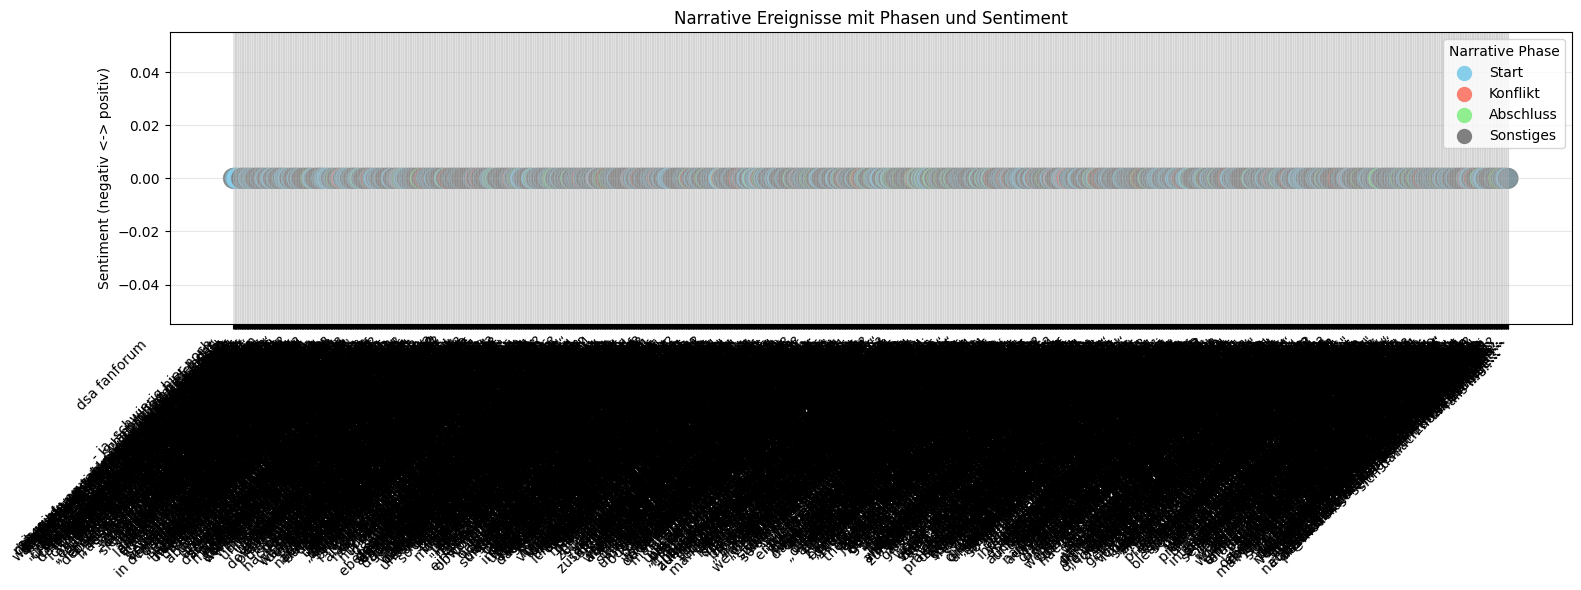

In [93]:
import matplotlib.pyplot as plt

# Beispiel: events aus vorheriger Pipeline
# events = [{'sentence':..., 'phase':..., 'sentiment':{'label':..., 'score':...}}, ...]

# 1️⃣ Farben für Narrative Phasen
phase_colors = {
    "Start": "skyblue",
    "Konflikt": "salmon",
    "Abschluss": "lightgreen",
    "Sonstiges": "grey"
}

# 2️⃣ X-Achse: Satznummern
x = list(range(len(events)))

# 3️⃣ Y-Achse: Sentiment-Score (0-1)
# Für Negativ: -score, Positiv: +score
y = []
for e in events:
    label = e['sentiment']['label']
    score = e['sentiment']['score']
    if label == "NEGATIVE":
        y.append(-score)
    elif label == "POSITIVE":
        y.append(score)
    else:
        y.append(0)  # NEUTRAL

# 4️⃣ Farben nach Phase
colors = [phase_colors[e['phase']] for e in events]

# 5️⃣ Plot erstellen
plt.figure(figsize=(16,6))
plt.scatter(x, y, c=colors, s=200, alpha=0.7)

# 6️⃣ Labels
plt.xticks(x, [e['sentence'][:40]+"..." if len(e['sentence'])>40 else e['sentence'] for e in events], rotation=45, ha='right')
plt.ylabel("Sentiment (negativ <-> positiv)")
plt.title("Narrative Ereignisse mit Phasen und Sentiment")
plt.grid(True, alpha=0.3)

# 7️⃣ Legende
for phase, color in phase_colors.items():
    plt.scatter([], [], c=color, label=phase, s=100)
plt.legend(title="Narrative Phase")

plt.tight_layout()
plt.show()


In [15]:
import spacy
import stanza
from flair.data import Sentence
from flair.models import SequenceTagger
from collections import Counter

# 1️⃣ spaCy
nlp_spacy = spacy.load("de_core_news_sm")

# 2️⃣ Stanza
stanza.download('de')
nlp_stanza = stanza.Pipeline('de', processors='tokenize,pos', verbose=False)

# 3️⃣ Flair
tagger_flair = SequenceTagger.load("de-pos")  # unterstützt Deutsch

def get_spacy_tags(text):
    doc = nlp_spacy(text)
    return [(token.text, token.pos_) for token in doc]

def get_stanza_tags(text):
    doc = nlp_stanza(text)
    tags = []
    for sentence in doc.sentences:
        for word in sentence.words:
            tags.append((word.text, word.upos))
    return tags

def get_flair_tags(text):
    sentence = Sentence(text)
    tagger_flair.predict(sentence)
    return [(token.text, token.labels[0].value) for token in sentence]

def majority_vote_tagging(text):
    spacy_tags = get_spacy_tags(text)
    stanza_tags = get_stanza_tags(text)
    flair_tags = get_flair_tags(text)

    words = [w for w, _ in spacy_tags]
    final_tags = []

    for i, word in enumerate(words):
        tags = [spacy_tags[i][1], stanza_tags[i][1], flair_tags[i][1]]
        tag_counts = Counter(tags)
        final_tag = tag_counts.most_common(1)[0][0]
        final_tags.append((word, final_tag))

    return final_tags

# Beispieltext
text = "Der schnelle braune Fuchs springt über den faulen Hund."
result = majority_vote_tagging(text)

for word, tag in result:
    print(f"{word:10} -> {tag}")


2025-11-19 15:39:40,267 SequenceTagger predicts: Dictionary with 58 tags: <unk>, O, APPR, ART, ADJA, NN, VVFIN, PIS, NE, FM, $,, KON, $., CARD, APPRART, $(, PROAV, KOUS, PPER, ADV, VVINF, VAFIN, VMFIN, ADJD, PTKVZ, PTKNEG, KOKOM, PIDAT, PIAT, VVPP, PRF, PTKA, TRUNC, PPOSAT, VVIZU, PTKZU, VAINF, VMINF, PWAV, PDAT, PRELS, KOUI, APPO, VAPP, PWAT, PWS, VVIMP, APZR, PDS, PRELAT
Der        -> DET
schnelle   -> ADJ
braune     -> ADJ
Fuchs      -> NOUN
springt    -> VERB
über       -> ADP
den        -> DET
faulen     -> ADJ
Hund       -> NOUN
.          -> PUNCT


In [23]:
import spacy
from spacy.training import Example

# Basis: deutsches spaCy-Modell
nlp = spacy.load("de_core_news_sm")
tagger = nlp.get_pipe("tagger")

# Deine DSA-Trainingsdaten
TRAIN_DATA = [
    ("Der Rondrageweihte zieht sein Schwert.", 
     {"pos": ["DET", "NOUN", "VERB", "PRON", "NOUN", "PUNCT"]}),
    ("Alrik von Gareth betet zu Praios.", 
     {"pos": ["PROPN", "ADP", "PROPN", "VERB", "ADP", "PROPN", "PUNCT"]})
]

# Feintuning
for epoch in range(10):
    for text, annotations in TRAIN_DATA:
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, annotations)
        nlp.update([example])

# Speichern
nlp.to_disk("de_dsa_pos_tagger")


### Wieder laden

In [24]:
nlp = spacy.load("de_dsa_pos_tagger")
doc = nlp("Der Magier von Punin ruft den Dämon.")
for token in doc:
    print(token.text, token.pos_)



Der DET
Magier NOUN
von ADP
Punin PROPN
ruft VERB
den DET
Dämon NOUN
. PUNCT


## DSA Beispiel

In [2]:
import spacy

nlp = spacy.load("de_dsa_tagger")

text = "Der Geweihte von Peraine spricht ein Gebet."
doc = nlp(text)

for token in doc:
    print(f"{token.text:12} → {token.pos_}")



Der          → ADJ
Geweihte     → NOUN
von          → ADP
Peraine      → PROPN
spricht      → VERB
ein          → ADJ
Gebet        → NOUN
.            → PUNCT


# Neuer Ansatz ab Mittwoch 26.11.

In [2]:
import spacy

nlp = spacy.load("de_core_news_lg")

text = "Der Geweihte von Peraine spricht ein Gebet."
doc = nlp(text)

for token in doc:
    print(f"{token.text:12} → {token.pos_}")

Der          → DET
Geweihte     → NOUN
von          → ADP
Peraine      → PROPN
spricht      → VERB
ein          → DET
Gebet        → NOUN
.            → PUNCT


In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("de_core_news_lg")

reise_patterns = [
    # wanderte, wanderten, wanderst, wandert, etc.
    [{"LOWER": {"REGEX": "^wander"} , "POS": "VERB"}],

    # Lemma: reisen, ziehen, marschieren, durchqueren
    [{"LEMMA": {"IN": ["erreichen","reisen","ziehen","marschieren","durchqueren"]}, "POS": "VERB"}],

    # trennbares aufbrechen → brach ... auf
    [{"LEMMA": "brechen", "POS": "VERB"}, {"LOWER": "auf"}],

    # Nomen
    [{"LEMMA": {"IN": ["reise","weg","pfad","expedition","marsch"]}, "POS": "NOUN"}],
]

kampf_patterns = [
    [{"LEMMA": {"IN": ["kämpfen","angreifen","verteidigen","zuschlagen","stechen"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["kampf","angriff","duell","schlacht","gegner","feind"]}, "POS": "NOUN"}]
]

ausruhen_patterns = [
    # ruhten
    [{"LEMMA": {"IN": ["ruhen","rasten","schlafen","lagern","entspannen"]}, "POS": "VERB"}],
    
    # ruhten ... aus  (trennbar!)
    [{"LEMMA": "ruhen"}, {"LOWER": "aus"}],

    # Nomen
    [{"LEMMA": {"IN": ["rast","pause","lager","ruhe","erholung"]}, "POS": "NOUN"}]
]

rettung_patterns = [
    [{"LEMMA": {"IN": ["retten","befreien","beschützen","opfern"]}, "POS": "VERB"}],
    [{"LOWER": {"IN": ["rettung","hilferuf","opfer","heldentat","gefahr","bedrohung"]}, "POS": "NOUN"}]
]

flucht_patterns = [
    # fliehen, entkommen, flüchten
    [{"LEMMA": {"IN": ["fliehen","entkommen","flüchten","verstecken"]}, "POS": "VERB"}],

    # trennbares wegrennen / rannte ... weg
    [{"LEMMA": "rennen", "POS": "VERB"}, {"LOWER": "weg"}],
    [{"LOWER": "weg"}, {"LEMMA": "rennen"}],

    [{"LEMMA": {"IN": ["flucht","unterschlupf","versteck","panik"]}, "POS": "NOUN"}]
]

training_patterns = [
    [{"LEMMA": {"IN": ["trainieren","üben","vorbereiten","meditieren"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["training","übung","vorbereitung","lektion","technik"]}, "POS": "NOUN"}]
]

verfolgung_patterns = [
    [{"LEMMA": {"IN": ["verfolgen","jagen","suchen"]}, "POS": "VERB"}],
    [{"LEMMA": "spüren", "POS": "VERB"}, {"LOWER": "auf"}],
    [{"LEMMA": {"IN": ["verfolgung","jagd","spur","fährte"]}, "POS": "NOUN"}]
]

ruf_patterns = [
    [{"LEMMA": {"IN": ["rufen","einladen","beauftragen","verkünden","offenbaren"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["ruf","auftrag","prophezeiung","vision","botschaft"]}, "POS": "NOUN"}]
]
belohnung_patterns = [
    [{"LEMMA": {"IN": ["belohnen","erkennen","verstehen","entdecken","gewinnen"]}, "POS": "VERB"}],
    [{"LEMMA": {"IN": ["belohnung","schatz","erkenntnis","wahrheit","einsicht"]}, "POS": "NOUN"}]
]

categories = {
    "Reise": reise_patterns,
    "Kampf": kampf_patterns,
    "Ausruhen": ausruhen_patterns,
    "Rettung": rettung_patterns,
    "Flucht": flucht_patterns,
    "Training": training_patterns,
    "Verfolgung": verfolgung_patterns,
    "Ruf": ruf_patterns,
    "Belohnung": belohnung_patterns
}

# Matcher erstellen
matcher = Matcher(nlp.vocab)

# Patterns dem Matcher hinzufügen
for label, patterns in categories.items():
    matcher.add(label, patterns)

for post in final_posts:
    doc = nlp(post)
    matches = matcher(doc)
    #print(matches)

    # Ergebniscontainer
    category_hits = {c: [] for c in categories}

    # Treffer zuordnen
    for match_id, start, end in matches:
        label = nlp.vocab.strings[match_id]
        span = doc[start:end]
        category_hits[label].append(span.text)

    # Ausgabe
    for cat, hits in category_hits.items():
        if hits:
            print(f"{cat}: {hits}")


In [136]:
print("---- MATCHES ----")
for match_id, start, end in matches:
    label = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(f"{label:10}  →  '{span.text}'   at {start}-{end}")

print("---- TOKENS ----")
for t in doc:
    print(f"{t.i:02d}  {t.text:12}  LEMMA={t.lemma_:12}  POS={t.pos_}")


---- MATCHES ----
---- TOKENS ----
00  "             LEMMA=--            POS=PUNCT
01  Karawanenführer  LEMMA=Karawanenführer  POS=NOUN
02  ?             LEMMA=--            POS=PUNCT
03  Nein          LEMMA=nein          POS=PART
04  .             LEMMA=--            POS=PUNCT
05  Das           LEMMA=der           POS=PRON
06  trifft        LEMMA=treffen       POS=VERB
07  tatsächlich   LEMMA=tatsächlich   POS=ADV
08  nicht         LEMMA=nicht         POS=PART
09  zu            LEMMA=zu            POS=ADP
10  .             LEMMA=--            POS=PUNCT
11  Wir           LEMMA=wir           POS=PRON
12  haben         LEMMA=haben         POS=AUX
13  uns           LEMMA=sich          POS=PRON
14  auch          LEMMA=auch          POS=ADV
15  gerade        LEMMA=gerade        POS=ADV
16  erst          LEMMA=erst          POS=ADV
17  kennengelernt  LEMMA=kennenlernen  POS=VERB
18  "             LEMMA=--            POS=PUNCT
19  ,             LEMMA=--            POS=PUNCT
20  antwortet     

---

**Über Beautiful Soup scrappen und dann verarbeiten? Würde deutlich schneller gehen und für deutlich größere Threads.
Damit könnte man gezielt die html-tags abgreifen, die man braucht. Wäre auch weniger zum preprocessen und dadurch fehlerresistenter**

In [14]:
import nltk
nltk.download('book')


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/timc/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /home/timc/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /home/timc/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/timc/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/timc/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/timc/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /home/timc/nltk_data...
[nltk_data]    |   Unzipping corpora/d

True

In [16]:
import matplotlib.pyplot as plt
from nltk.book import *
import nltk

In [26]:
################ Kapitel 1
print("############################# Auflistung des entsprechenden Suchwortes #############################\n")

text2.concordance("monstrous") #Auflistung des entsprechenden Suchwortes

############################# Auflistung des entsprechenden Suchwortes #############################

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they

In [ ]:
print("############################# Worte die Ähnlich verwendet werden wie der String #############################\n")

text2.similar("monstrous") #Worte die Ähnlich verwendet werden wie der String

############################# Worte die Ähnlich verwendet werden wie der String #############################

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [21]:
print("########### Kann die Kontexte untersuchen, die zwei oder mehr Wörter gemeinsam haben, wie z. B. monstrous und very ####################\n")

text2.common_contexts(["monstrous", "very"]) #Kann die Kontexte untersuchen, die zwei oder mehr Wörter gemeinsam haben, wie z. B. monstrous und very.


########### Kann die Kontexte untersuchen, die zwei oder mehr Wörter gemeinsam haben, wie z. B. monstrous und very ####################

am_glad a_pretty a_lucky is_pretty be_glad


/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


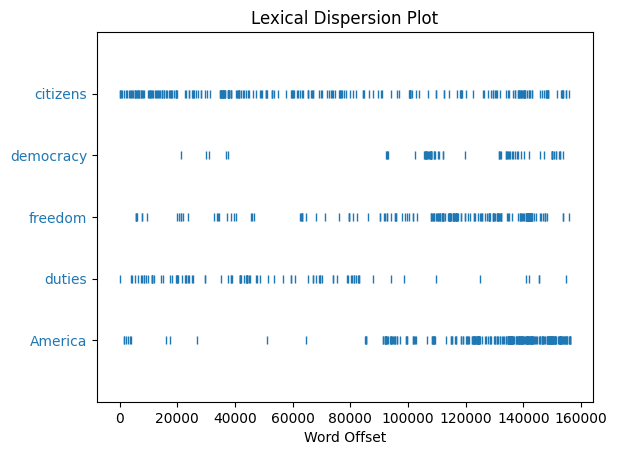

In [23]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"]) #Stellt grafisch die Positionen im Text an denen die einzelnen Wörter vorkommen dar
plt.show()

['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.', 'And', 'the', 'earth', 'was', 'without', 'form', ',', 'and', 'void']
['!', "'", '(', ')', ',', ',)', '.', '.)', ':', ';', ';)', '?', '?)', 'A', 'Abel', 'Abelmizraim', 'Abidah', 'Abide', 'Abimael', 'Abimelech', 'Abr', 'Abrah', 'Abraham', 'Abram', 'Accad', 'Achbor', 'Adah', 'Adam', 'Adbeel', 'Admah', 'Adullamite', 'After', 'Aholibamah', 'Ahuzzath', 'Ajah', 'Akan', 'All', 'Allonbachuth', 'Almighty', 'Almodad', 'Also', 'Alvah', 'Alvan', 'Am', 'Amal', 'Amalek', 'Amalekites', 'Ammon', 'Amorite', 'Amorites', 'Amraphel', 'An', 'Anah', 'Anamim', 'And', 'Aner', 'Angel', 'Appoint', 'Aram', 'Aran', 'Ararat', 'Arbah', 'Ard', 'Are', 'Areli', 'Arioch', 'Arise', 'Arkite', 'Arodi', 'Arphaxad', 'Art', 'Arvadite', 'As', 'Asenath', 'Ashbel', 'Asher', 'Ashkenaz', 'Ashteroth', 'Ask', 'Asshur', 'Asshurim', 'Assyr', 'Assyria', 'At', 'Atad', 'Avith', 'Baalhanan', 'Babel', 'Bashemath', 'Be', 'Because', 'Becher', 'Bedad', '

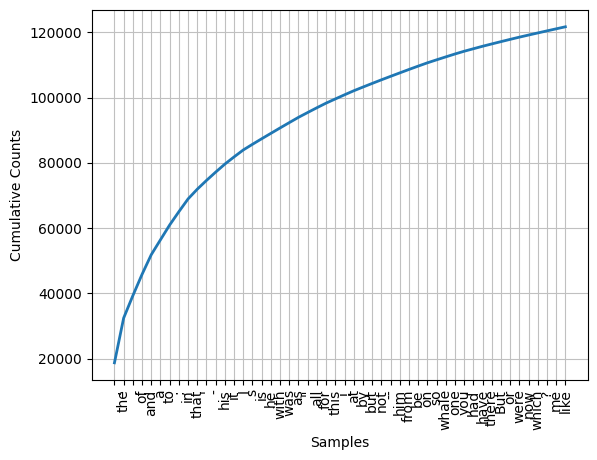

In [24]:

print(text3[:20])
print(sorted(set(text3))) #set erstellt eine Liste (Eselsbrücke: Ein Set!) an Elementen die in der ausgewählten Variable/Liste vorkommen. Jedoch ohne Häufigkeit
print("---------------------------------------")
print(len(set(text3)))
print(len(set(text3))/len(text3))

print("smote:",text3.count("smote"))
print("god:",text3.count("God"))
print(100 * text4.count('a') / len(text4))

test = "To be or not to be? Thats the question!"
print(test)
print(sorted(set(test)))
print("---------------------------------------")
print(len(set(test)))
print(len(set(test))/len(test))
print("a:",test.count("n"))

print("SENT")
print(sent2)

print("################ Aufgabe 3") ################ Aufgabe 3

### Aufgabe 3.1

fdist1 = FreqDist(text1) #Frequency Distribution (Frequenzverteilung); Wie oft befindet sich jedes einzelne Wort in text1 (Moby Dick)
print("fdist1:",fdist1) #Samples = Anzahl einzigartiger Wörter; Outcomes = Gesamtzahl aller Wörter, einschließlich Wiederholungen

print("fdist1 most common:",fdist1.most_common(50)) #Zeige die häufigsten 50 wörter an; Keine Zahl zeigt alle Wörter an

print("fsist1 'wahle':",fdist1['whale']) #Wie oft kommt STRING (zB wahle) im Text vor?

fdist1.plot(50, cumulative=True) #Plotted die Häufigkeit der ersten n (in unserem bsp 50) Wörter
#plt.show()

print("hapaxes:",fdist1.hapaxes()) #Hapax oder Hapax legomena (Einzahl: Hapax legomenon) Begriff aus der Sprachwissenschaft und bedeutet "einmal gesagte Wörter"

### Aufgabe 3.2

V = set(text1) #V für Vocabular 
long_words = [w for w in V if len(w) > 15] #Wörter mit mindestens einer Länge von 15 Buchstaben

print("Long Words:",sorted(long_words))

fdist5 = FreqDist(text5)
print(sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)) #Finde Wörter die mind. 7 Buchstaben lang sind und min. 7 mal im Text vorkommen

### Aufgabe 3.3

print("bigrams:",list(bigrams(['more', 'is', 'said', 'than', 'done'])))
print("#############################################################################################")
print("text4 collocations:")
text4.collocations() # Erstellt eine Liste an Kollokationen

### Aufgabe 3.4

print("Länge:",[len(w) for w in text1]) #Länge der Wörter

fdist = FreqDist(len(w) for w in text1) #FreqDist zählt die Häufigkeit wie oft welche längen vorkommen
print(fdist)
print("-----------")
print("fdist most common:",fdist.most_common()) #Zeige die häufigsten wörter an
print("Max:",fdist.max()) #Zeige mit welche Wortlänge am häufigsten vorkommt
print("Wörter mit 3 Zeichen:",fdist[3]) #Wie oft kommt das Wort, welches vorher mit max ermittelt wurde im Text vor? Hier: Über 50.000 mal
print("Frequenz:",fdist.freq(3)) #Wie hoch ist die Häufigkeitsfrequenz? In dem Fall 19,3 %

In [7]:
#######################################################################
# Test Kontextbezogene Auswertung von Verben am Beispiel von "reisen" #
#######################################################################
import spacy

# Lade ein deutsches spaCy-Modell
nlp = spacy.load("de_core_news_lg")

# Liste von Reise-Verben und typischen Präpositionen/Objekten
reise_verben = {
    "reisen": ["nach", "in", "zu"],
    "ziehen": ["nach", "in", "zu"],
    "fahren": ["nach", "in", "zu", "mit"],
    "fliegen": ["nach", "in", "zu", "mit"],
    "wandern": ["durch", "in"],
    "starten": ["zu", "von"],
    "aufbrechen": ["zu", "nach"],
    "abreisen": ["ab", "von"],
    "sich begeben": ["nach", "in", "zu"],
    "pendeln": ["zwischen", "mit"],
    "umziehen": ["nach", "in"]
}

# Kontextwörter für Reise
reise_trigger = [
    "stadt", "land", "urlaub", "ferien", "route",
    "bahnhof", "flughafen", "flugzeug", "auto",
    "bus", "bahn", "destination", "expedition"
]

def ist_reise_sinn(text):
    doc = nlp(text.lower())
    
    for token in doc:
        # Prüfe, ob Verb in der Liste ist
        verb_lemma = token.lemma_
        if verb_lemma in reise_verben:
            # Prüfe Präpositionen
            for child in token.children:
                if child.dep_ in ("prep", "case") and child.text in reise_verben[verb_lemma]:
                    # Prüfe Kontextwörter im Satz
                    for w in reise_trigger:
                        if w in text.lower():
                            return True
                    # Wenn Präposition passt, Reise wahrscheinlich
                    return True
    return False

# Beispiele
beispiele = [
    "Er zieht nach Paris.",
    "Manfred zieht aus seiner Tasche eine Flasche.",
    "Sie fährt mit dem Zug nach München.",
    "Das hier zieht unangenehme Kreise."
]

for satz in beispiele:
    print(f"'{satz}' -> Reise-Sinn: {ist_reise_sinn(satz)}")


'Er zieht nach Paris.' -> Reise-Sinn: False
'Manfred zieht aus seiner Tasche eine Flasche.' -> Reise-Sinn: False
'Sie fährt mit dem Zug nach München.' -> Reise-Sinn: False
'Das hier zieht unangenehme Kreise.' -> Reise-Sinn: False


# Tranformer Spielwiese

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

/home/timc/Workspace/nlp-rpg-narratives/nlp-rpg-venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9598046541213989}]

In [21]:
classifier = pipeline("zero-shot-classification", model="distilbert/distilbert-base-german-cased")
classifier(
    "Er ging zu Bett",
    candidate_labels=["Kampf", "Erholung", "Verhandlungen"],
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-german-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


{'sequence': 'Er ging zu Bett',
 'labels': ['Erholung', 'Verhandlungen', 'Kampf'],
 'scores': [0.3343108594417572, 0.33407071232795715, 0.33161839842796326]}

In [ ]:
translator = pipeline("translation", model="facebook/nllb-200-distilled-600M")
translator("Ce cours est produit par Hugging Face.")